# Machine Learning

1. Classification
2. Regression
3. Neuron

Steps:
1. Load the Data
2. Split Train / Test sets
3. Build Model
4. Fit
5. Evaluate
6. Predict


[TensorFlow Documentation](https://www.tensorflow.org/api_docs)

### Import Libraries

In [4]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## Classification

### Load the Data

In [5]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

print(data.keys())
#print(data.DESCR)
print(data.data.shape)  # data.data = Array
print(data.target.shape)
print(data.target_names)
print(data.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(569, 30)
(569,)
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Split Train / Test sets, Standardize

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)

N, D = X_train.shape

In [7]:
N, D

(381, 30)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)   # Fit and transform at same time
X_test = scaler.transform(X_test)

### Build Model

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternative
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'), input_shape=(D,))

model.compile(
    optimizer="adam",   # Gradient Descent
    loss="binary_crossentropy",
    metrics=['accuracy']
    )

### Fit / Train Model

In [10]:
r = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100
    )

Epoch 1/100
12/12 [==============================] - 3s 88ms/step - loss: 1.2146 - accuracy: 0.2782 - val_loss: 1.1883 - val_accuracy: 0.2340
Epoch 2/100
12/12 [==============================] - 0s 28ms/step - loss: 1.1123 - accuracy: 0.3123 - val_loss: 1.0874 - val_accuracy: 0.2979
Epoch 3/100
12/12 [==============================] - 0s 26ms/step - loss: 1.0220 - accuracy: 0.3438 - val_loss: 0.9939 - val_accuracy: 0.3351
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.9355 - accuracy: 0.3911 - val_loss: 0.9109 - val_accuracy: 0.3830
Epoch 5/100
12/12 [==============================] - 0s 15ms/step - loss: 0.8594 - accuracy: 0.4488 - val_loss: 0.8368 - val_accuracy: 0.4734
Epoch 6/100
12/12 [==============================] - 0s 17ms/step - loss: 0.7907 - accuracy: 0.5066 - val_loss: 0.7724 - val_accuracy: 0.5213
Epoch 7/100
12/12 [==============================] - 0s 20ms/step - loss: 0.7319 - accuracy: 0.5538 - val_loss: 0.7145 - val_accuracy: 0.5851
Epoch 8

### Evaluate

In [11]:
print("Train Score: ", model.evaluate(X_train, y_train))
print("Test Score: ", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.1199 - accuracy: 0.9738
Train Score:  [0.11989489197731018, 0.9737532734870911]
6/6 [==============================] - 0s 2ms/step - loss: 0.1117 - accuracy: 0.9787
Test Score:  [0.1116790771484375, 0.978723406791687]


### Plot Loss

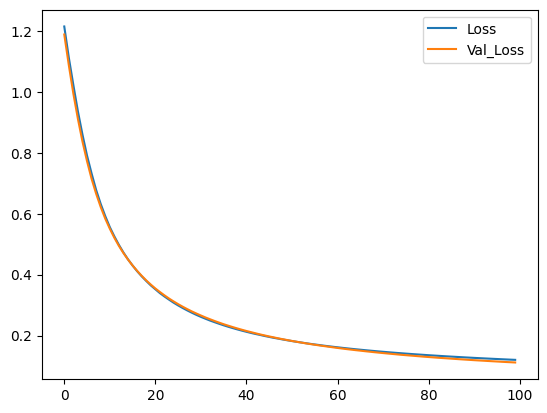

In [12]:
import matplotlib.pyplot as plt

plt.plot(
    r.history['loss'],
    label='Loss'
    )
plt.plot(
    r.history['val_loss'],
    label='Val_Loss'
    )
plt.legend();

### Plot Accuracy

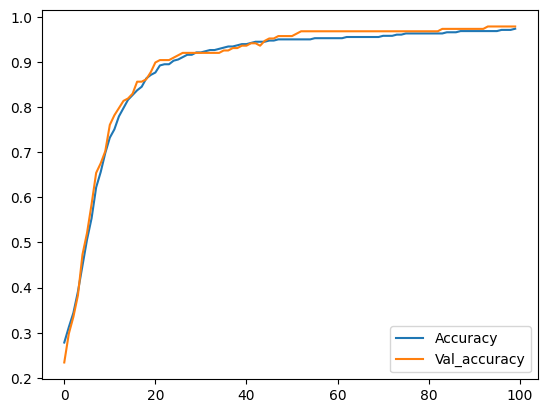

In [13]:
plt.plot(
    r.history['accuracy'],
    label='Accuracy'
    )
plt.plot(
    r.history['val_accuracy'],
    label='Val_accuracy'
    )
plt.legend();

## Regression

Normally we dont pass activation function (Ex: Sigmoid), isn't needed with continuous variables.

* Gradient descent (adam) is Default
* Stochastic Gradient Descent (SGD)

Loss: MSE (Mean Squared Error)

Don't use accuracy in regression
`1 = 1,001`, Accuracy 0 and we have a good prediction.

Logistic makes a exponential function linear.

### Import Libraries

In [14]:
import pandas as pd
import numpy as np

### Load the Data

In [15]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

data = pd.read_csv('moore.csv', header=None)#.to_numpy()
print(data.head())

data = data.to_numpy()

# Predictors / Inputs
X = data[:,0].reshape(-1, 1)  # Scaling

# Target / Output
Y = data[:, 1]

--2024-01-08 14:14:49--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-01-08 14:14:49 (31.1 MB/s) - ‘moore.csv’ saved [2302/2302]

      0     1
0  1971  2300
1  1972  3500
2  1973  2500
3  1973  2500
4  1974  4100


### Plot Data

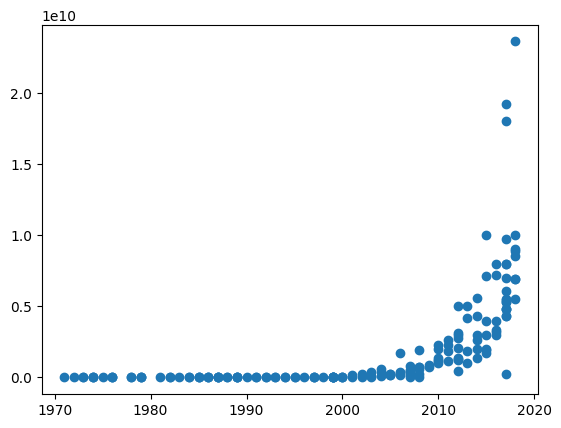

In [16]:
plt.scatter(X, Y);

### Apply Log to make Linear

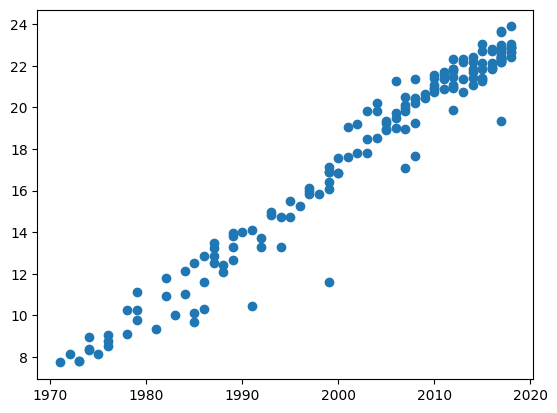

In [17]:
Y = np.log(Y)
plt.scatter(X, Y);

### Shift data by mean - Translate

* Removes the X labels
* Give 0 mean

In [18]:
X = X - X.mean()

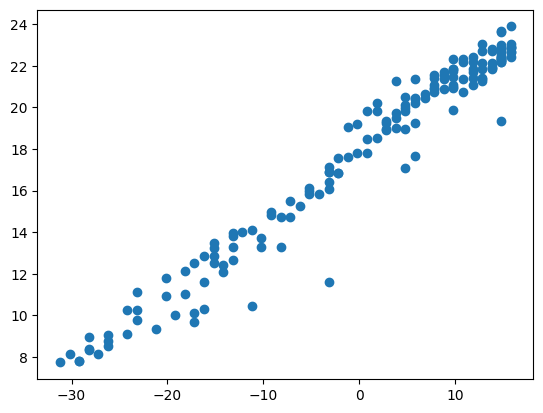

In [19]:
plt.scatter(X, Y);

### Build the Model

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),  # Learning rate, Momentum
    loss='mse',   # Mean Square Error
)

# Dynamic Learning Rate
def schedule(epoch, learning_rate):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

### Train the Model

In [21]:
r = model.fit(X, Y, epochs=100, callbacks=[scheduler])

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 402.7794 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 308.2800 - lr: 0.0010
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 252.0913 - lr: 0.0010
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 193.5147 - lr: 0.0010
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 190.2216 - lr: 0.0010
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 158.7177 - lr: 0.0010
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 97.0139 - lr: 0.0010
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 78.7731 - lr: 0.0010
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 54.3883 - lr: 0.0010
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 50.5572 - lr: 0.0010
Epoch 11/100
6/6 [==============================] - 0s 4ms/step - loss: 2

### Plot Loss

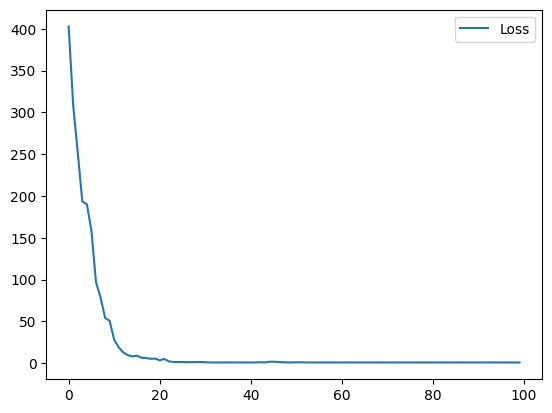

In [22]:
plt.plot(r.history['loss'], label='Loss')
plt.legend();

In [23]:
model.layers

In [24]:
model.layers[0].get_weights()

[array([[0.33206326]], dtype=float32), array([17.757755], dtype=float32)]

In [25]:
a = model.layers[0].get_weights()[0][0, 0]
a

0.33206326

### Log  to Linear

* `C` - Y
* `A0` - X0
* `r` - Rate of growth
* `t` - Time

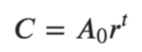

When we take log of both sides:
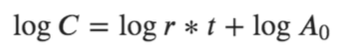

This is a linear equation

`y = ax + b`

* `y` = log(C)
* `a / slope` = log(r)
* `x` = t
* `b` = log(A0)

We know that `a = 0.02218882`

so

`r = e^0.0.33855414 = 1.40291770086`


To find the time Y needs to double we can use:

* `2C`

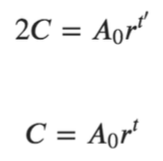

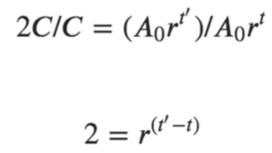

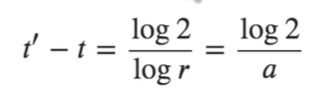



Time to double is `log(2)/a`

In [26]:
print("Time to double:", np.log(2) / a)
# 2 years because we don't scaled

Time to double: 2.0873949902586877


### Analytical Solution

In [27]:
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()

a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

print(a, b)

0.341682487387313 17.764939393631764


# Save the Model

In [28]:
model.save('modelfile.h5')
!ls -lh

total 28K
-rw-r--r-- 1 root root  18K Jan  8 14:14 modelfile.h5
-rw-r--r-- 1 root root 2.3K Jan  8 14:14 moore.csv
drwxr-xr-x 1 root root 4.0K Jan  4 14:21 sample_data


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Load Model

In [29]:
!ls -lh
loaded_model = tf.keras.models.load_model('modelfile.h5')
print(loaded_model.layers)

total 28K
-rw-r--r-- 1 root root  18K Jan  8 14:14 modelfile.h5
-rw-r--r-- 1 root root 2.3K Jan  8 14:14 moore.csv
drwxr-xr-x 1 root root 4.0K Jan  4 14:21 sample_data
